# Trainning, hypertunning and evaluating models

**Import** data from "data/featured.csv"

**Export** model to "model/v01"

In [17]:
# Setup

import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import shap

from pkg import utils
from pkg import feature

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [9]:
# Importing data

parent = 'data'
filename = 'featured.csv'

path = utils.get_path(parent, filename)

df = pd.read_csv(path, index_col=0)
df.head()

,bayley_3_t1,dominance_simpson,12DICHLORETHDEG-PWY,AEROBACTINSYN-PWY,ALLANTOINDEG-PWY,CRNFORCAT-PWY,DENITRIFICATION-PWY,DHGLUCONATE-PYR-CAT-PWY,DTDPRHAMSYN-PWY,METH-ACETATE-PWY,...,RH_temporal_theta_t1,Occipital_low_alpha_t1,RH_lateral_frontal_high_alpha_t1,LH_lateral_frontal_beta_t1,LH_parietal_beta_t1,RH_temporal_beta_t1,LH_temporal_beta_t1,b04_t1,renda_familiar_total_t0,a08_t1
id_estudo,,,,,,,,,,,,,,,,,,,,,
7,1,0.136112,0.0,0.000000,7.676483,0.0,0.000000,0.0,4395.178167,0.0,...,11.066145,6.399995,1.984560,1.480601,1.164159,2.233020,1.577486,1.0,8.517593,1.0
8,1,0.451324,0.0,0.000000,14.984719,0.0,320.494755,0.0,4478.753445,0.0,...,7.316511,7.473895,1.252036,1.073858,0.973935,0.806549,1.251462,1.0,10.404323,1.0
14,1,0.281675,0.0,209.593817,0.000000,0.0,0.000000,0.0,2755.525229,0.0,...,10.349887,10.194401,2.383895,1.754353,1.708441,1.437741,2.593411,1.0,9.588914,1.0
24,0,0.945041,0.0,0.000000,0.000000,0.0,26.374059,0.0,2725.705501,0.0,...,11.525351,7.343360,2.418379,3.367270,2.326717,3.000494,4.347992,2.0,7.601402,2.0
26,0,0.338783,0.0,0.000000,0.000000,0.0,0.000000,0.0,725.879153,0.0,...,10.511222,6.003053,1.277228,1.866852,1.555874,2.296068,1.590318,2.0,7.147559,2.0


In [10]:
# Parameters

seed = 123

In [11]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [13]:
rf = RandomForestClassifier(max_depth=45, criterion='gini', random_state=seed)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=45, random_state=123)

In [16]:
y_hat = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [15]:
# Exporting model

model = rf # Add final df
filename = "v01.pkl"

run_save = False
if not run_save:
  utils.save_model(model, filename)
  run_save = True

NameError: name 'best_rf' is not defined

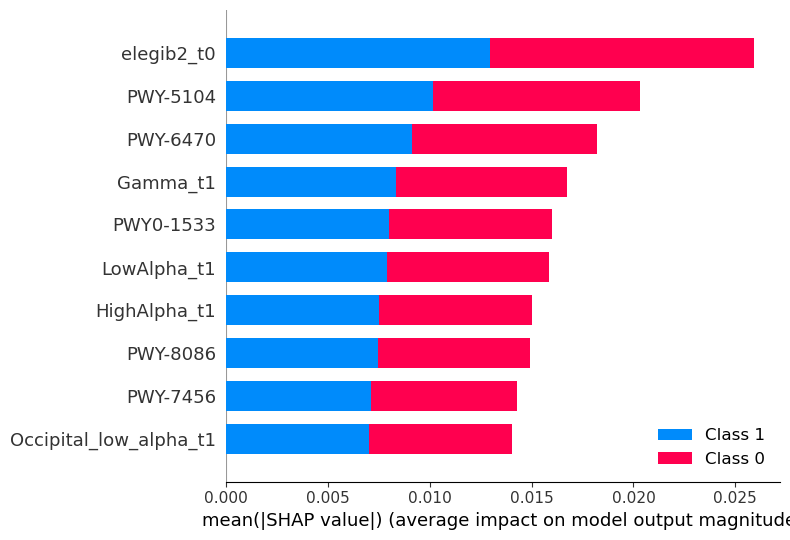

In [19]:
explainer = shap.TreeExplainer(rf)
# sample = X_test.sample(100)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=10)